In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("bme_clinical_data.xlsx",sheet_name="All Data",header=1)
#We need to take only trauma patient data: upto 63 rows
df=df.iloc[:63,1:]
df_er=df.iloc[:,:30]

In [3]:
def describe_df(df):
    print(df.info(),"\n")
    
    print(df.isnull().sum(),"\n")
    print(df.head(1))
    print(df.describe())
    

In [4]:
describe_df(df)
describe_df(df_er)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Columns: 139 entries, Age to injuries
dtypes: float64(31), object(108)
memory usage: 68.5+ KB
None 

Age            3
Inj Mech       0
Inj Pattern    0
Mortality      2
ISS            7
              ..
dvt            2
pe             2
stroke         3
mi_new         2
injuries       0
Length: 139, dtype: int64 

    Age  Inj Mech  Inj Pattern  Mortality   ISS  Hemmorhage  TBI yes/no  \
0  29.0       3.0          3.0        0.0  11.0         1.0         0.0   

   Head AIS  SCI yes/no  Spine AIS  ...  ais_spine  ais_upper  ais_lower  \
0       NaN         0.0        NaN  ...        NaN        NaN        NaN   

   ais_ext  ais_other  dvt  pe stroke  mi_new                     injuries  
0      NaN        NaN    0   0      0       0   - grade 3 liver laceration  

[1 rows x 139 columns]
             Age   Inj Mech  Inj Pattern  Mortality        ISS  Hemmorhage  \
count  60.000000  63.000000    63.000000  61.000000  5

In [5]:
#Getting the number of nan values in the dataset
isn=df.isnull().sum()
isn_er=df_er.isnull().sum()


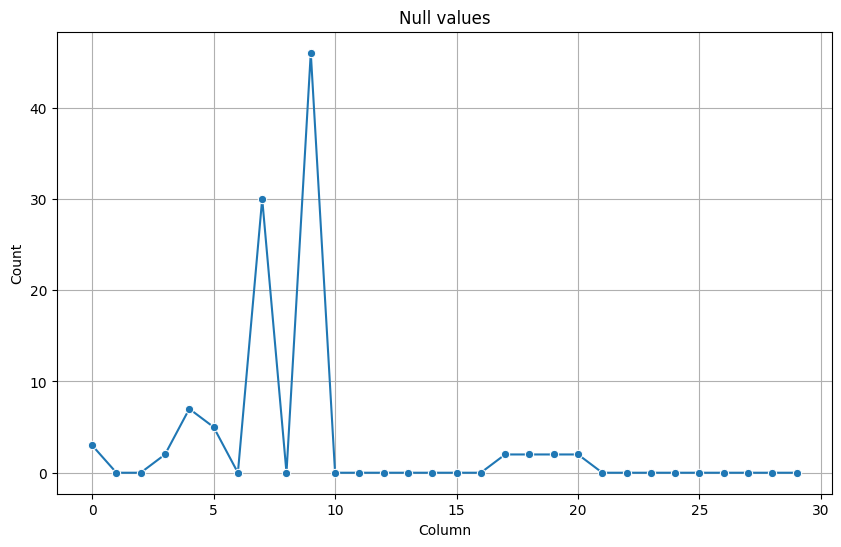

In [6]:
#  figure and axis for null values
plt.figure(figsize=(10, 6)) 
ax = sns.lineplot(x=range(len(isn_er)), y=isn_er, marker='o', linestyle='-')

ax.set_xlabel('Column')
ax.set_ylabel('Count')
ax.set_title('Null values')

ax.grid(True)

plt.show()


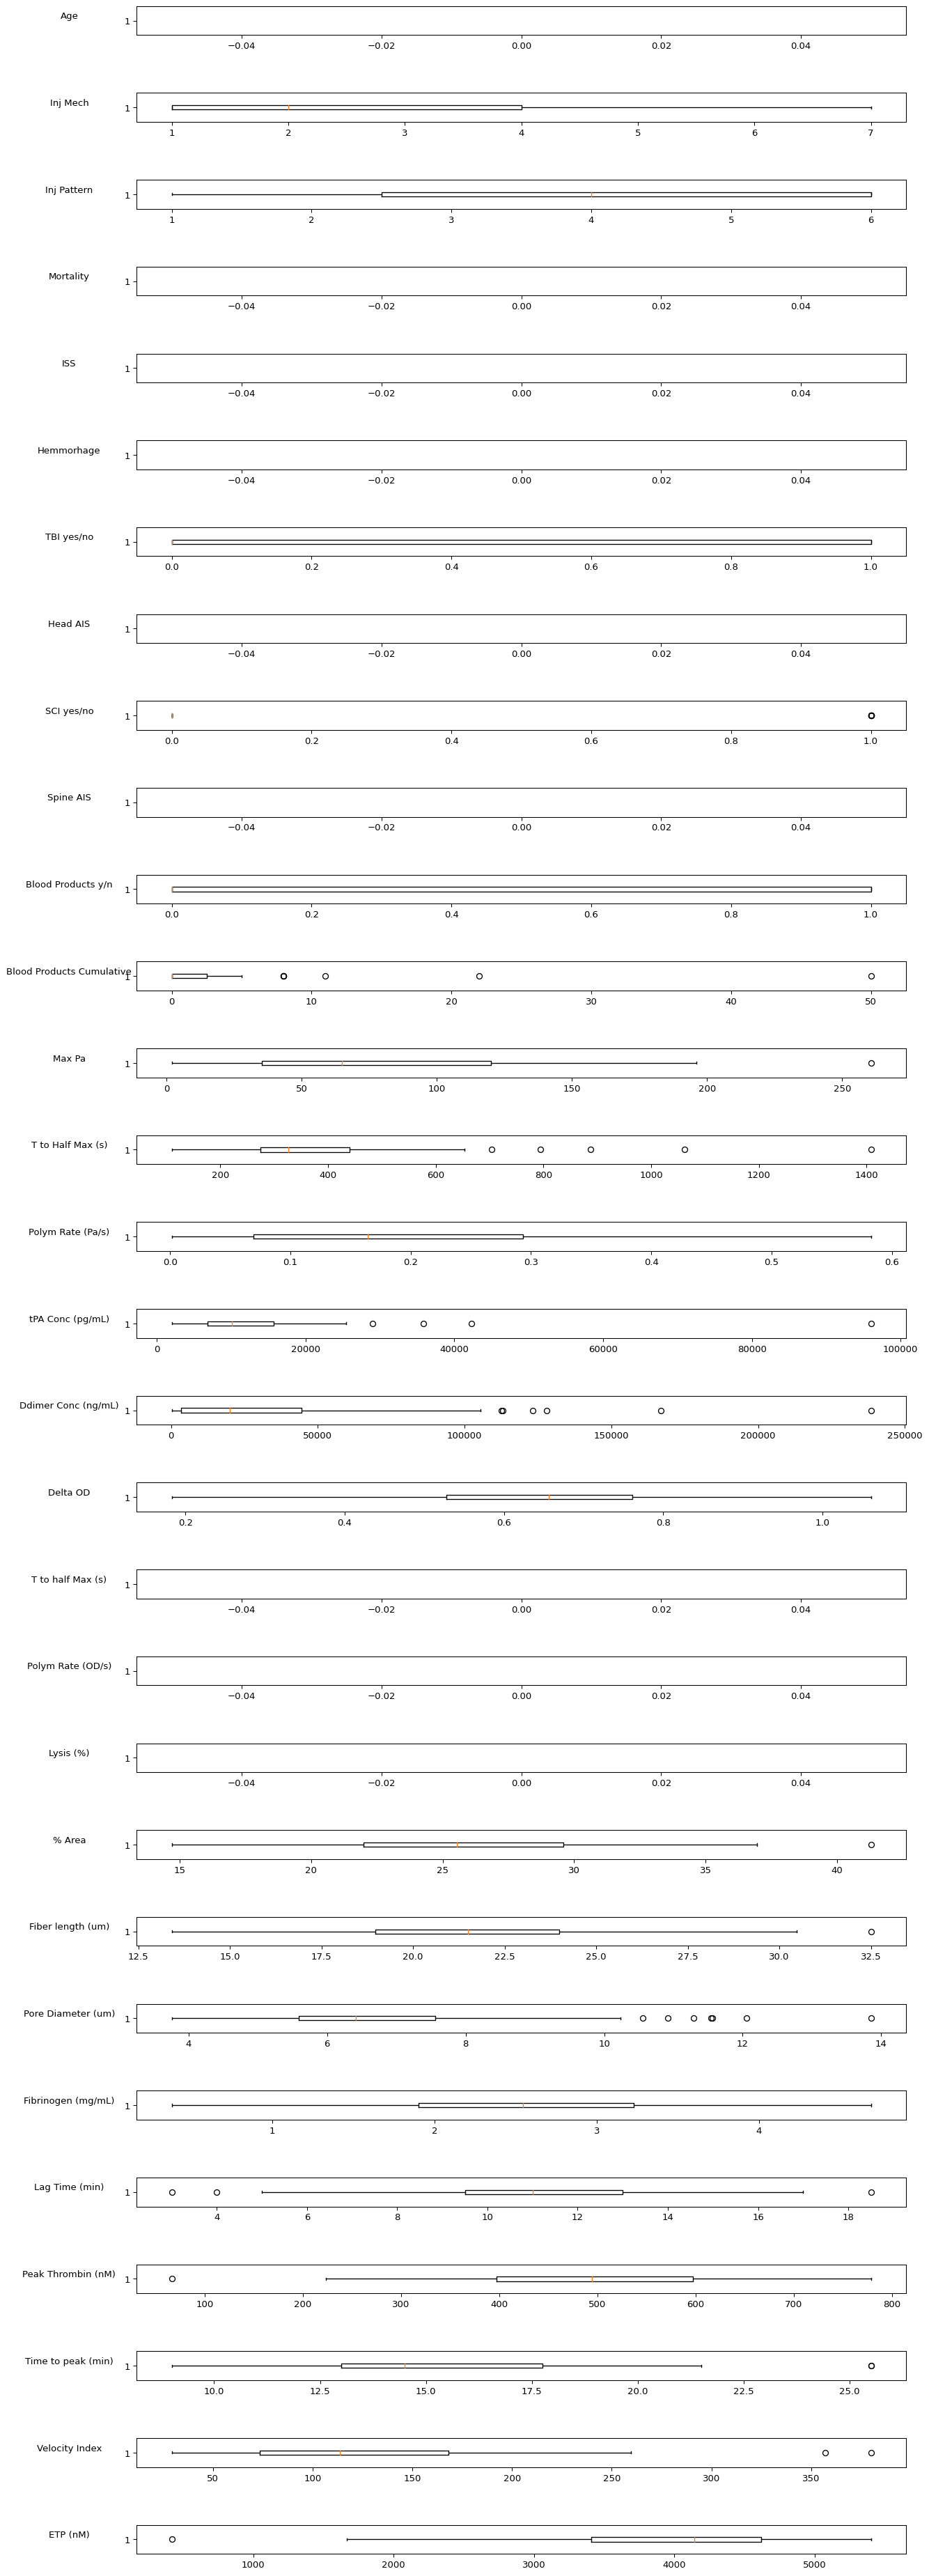

In [7]:
# Box Plots to find outliers
fig, axs = plt.subplots(30,1,dpi=95, figsize=(15,50))
i = 0
plt.subplots_adjust(hspace=2)
for col in df_er.columns:
	axs[i].boxplot(df_er[col], vert=False)
	axs[i].set_ylabel(col,rotation=0,labelpad=60)
	i+=1
plt.show()



A box plot (also known as a box-and-whisker plot) is a graphical representation of the distribution of a dataset. It provides a visual summary of key statistical measures.

The box in the plot represents the interquartile range (IQR), which is the middle 50% of the data. It is divided into two parts: the lower quartile (Q1) and the upper quartile (Q3), where the box spans from Q1 to Q3.

Inside the box, you'll typically see a horizontal line, which represents the median (Q2) of the data.

The "whiskers" extend from the box and represent the range of the data outside the IQR. They can indicate potential outliers.

Outliers (individual data points that are far from the central values) are plotted as individual points beyond the whiskers.

In a horizontal box plot (as specified by vert=False), the box is drawn horizontally, and the whiskers extend horizontally.

Upper Whisker: The upper whisker extends from the top edge of the box (the upper quartile, Q3) to the maximum data value within a certain range. This range is often defined as 1.5 times the interquartile range (IQR) beyond the upper quartile. Any data points beyond this range are considered potential outliers and are plotted individually as points.

Lower Whisker: The lower whisker extends from the bottom edge of the box (the lower quartile, Q1) to the minimum data value within a certain range. Similar to the upper whisker, this range is defined as 1.5 times the IQR below the lower quartile. Data points below this range are potential outliers and are plotted as points.

In [8]:
#  Treating nan values.--> Options
#  1. Replace nan with most frequent values in that particular column i.e. Mode
#  2. Remove rows - Not feasible since we only have 63 rows
# 3. Add a new column indicating which rows had missing values
# 4. Replace with median

# Choosing 1 for categorical columns and 4 for quantitative columns



In [9]:
df_er['Age'].fillna(df_er['Age'].median(),inplace=True)
df_er['Mortality'].fillna(df_er['Mortality'].mode()[0],inplace=True)
df_er['ISS'].fillna(df_er['ISS'].median(),inplace=True)
df_er['Hemmorhage'].fillna(df_er['Hemmorhage'].mode()[0],inplace=True)
df_er['Delta OD'].fillna(df_er['Delta OD'].median(),inplace=True)
df_er['Lysis (%)'].fillna(df_er['Lysis (%)'].median(),inplace=True)
df_er['T to Half Max (s)'].fillna(df_er['T to Half Max (s)'].median(),inplace=True)
df_er['T to half Max (s)'].fillna(df_er['T to half Max (s)'].median(),inplace=True)
df_er['Polym Rate (OD/s)'].fillna(df_er['Polym Rate (OD/s)'].median(),inplace=True)

# Dropping Head AIS and Spine AIS since they have almost half values missing

df_er=df_er.drop('Head AIS',axis=1)
df_er=df_er.drop('Spine AIS',axis=1)


In [10]:
# Now we need to encode the categorical columns before applying a ml model
# Categorical Variables:
# Assuming all variables are nominal(No particular order in the categories)
# Inj  Mech*	7
# Inj Pattern*	6
# Mortality	2
# Haemorrhage	2
# TBI yes/no	2
# SCI yes /no	2
# Blood Products y/n	2


In [11]:
df_er_encoded=pd.get_dummies(df_er,columns=['Inj Mech','Inj Pattern','Hemmorhage','TBI yes/no','SCI yes/no','Blood Products y/n'])
df_er_encoded=df_er_encoded.astype(float)
print(df_er_encoded.shape)



(63, 43)


In [12]:
#Applying Supervised Learning

In [13]:
X = df_er_encoded.drop('Mortality', axis=1)  # Features
y = df_er_encoded['Mortality']  # Target variable


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
#Train=38
#Test=25
#Traintestsplit function randomly splits the data into train and test, without maintaining any particular order

In [15]:
from sklearn.ensemble import RandomForestClassifier  # Example classifier

clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

Accuracy: 0.77
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        20
         1.0       0.50      0.33      0.40         6

    accuracy                           0.77        26
   macro avg       0.66      0.62      0.63        26
weighted avg       0.74      0.77      0.75        26



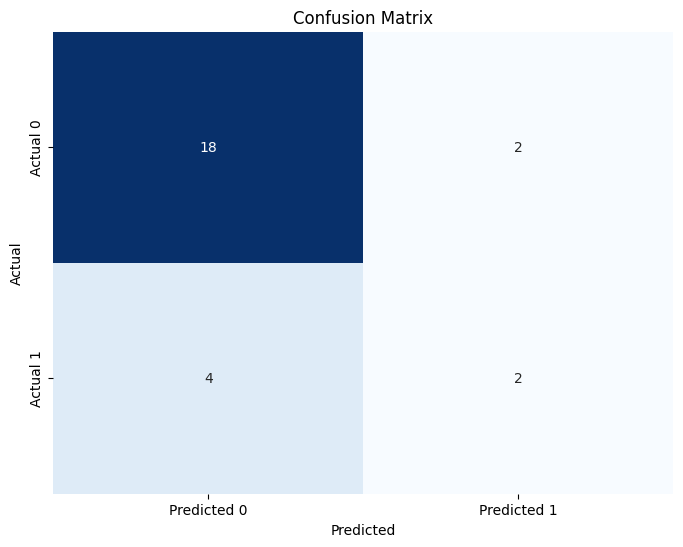

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
cm=(confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [24]:

# Getting feature importances
feature_importances = clf.feature_importances_

# Matching feature importances with feature names
feature_names = X.columns  # Replacing with the actual feature names
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sorting feature importances by importance score
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Printing the sorted feature importances
for feature, importance in sorted_feature_importances:
    print(f"{feature}: \t\t\t{importance:.4f}")

Ddimer Conc (ng/mL): 			0.1514
Fibrinogen (mg/mL): 			0.1026
Polym Rate (Pa/s): 			0.0834
ISS: 			0.0676
Max Pa: 			0.0627
tPA Conc (pg/mL): 			0.0559
Pore Diameter (um): 			0.0493
Peak Thrombin (nM): 			0.0438
Lysis (%): 			0.0412
Velocity Index: 			0.0336
T to half Max (s): 			0.0282
SCI yes/no_0.0: 			0.0215
% Area: 			0.0213
Delta OD: 			0.0211
TBI yes/no_1.0: 			0.0208
Fiber length (um): 			0.0193
Lag Time (min): 			0.0188
T to Half Max (s): 			0.0180
Polym Rate (OD/s): 			0.0179
ETP (nM): 			0.0170
Age: 			0.0153
Time to peak (min): 			0.0134
TBI yes/no_0.0: 			0.0121
SCI yes/no_1.0: 			0.0102
Hemmorhage_1.0: 			0.0093
Blood Products Cumulative: 			0.0075
Blood Products y/n_1.0: 			0.0063
Inj Pattern_3.0: 			0.0063
Blood Products y/n_0.0: 			0.0059
Inj Mech_1.0: 			0.0048
Inj Pattern_1.0: 			0.0042
Inj Mech_5.0: 			0.0025
Inj Mech_3.0: 			0.0020
Hemmorhage_0.0: 			0.0017
Inj Mech_2.0: 			0.0012
Inj Pattern_2.0: 			0.0011
Inj Pattern_6.0: 			0.0009
Inj Mech_4.0: 			0.0001
Inj Mech

In [69]:
#Random Forest with hyper parameter
clf_2 = RandomForestClassifier(
    n_estimators=300,          # Number of trees in the forest
    max_features=2,       # Number of features to consider at each split
    bootstrap=True,            # Whether to use bootstrapped samples
    random_state=2,            # Random seed for reproducibility
    oob_score=True
)

# Fit the classifier to your training data
clf_2.fit(X_train, y_train)


RandomForestClassifier(max_features=2, n_estimators=300, oob_score=True,
                       random_state=2)

Accuracy: 0.81
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88        20
         1.0       0.60      0.50      0.55         6

    accuracy                           0.81        26
   macro avg       0.73      0.70      0.71        26
weighted avg       0.80      0.81      0.80        26



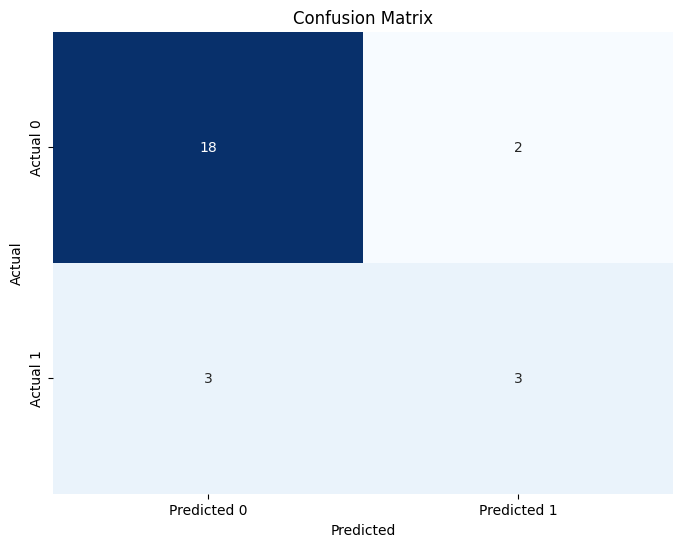

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_2 = clf_2.predict(X_test)
acc = accuracy_score(y_test, y_pred_2)
print(f'Accuracy: {acc:.2f}')
print(classification_report(y_test, y_pred_2))
cm=(confusion_matrix(y_test, y_pred_2))

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [72]:
# Getting feature importances
feature_importances = clf_2.feature_importances_

# Matching feature importances with feature names
feature_names = X.columns  # Replacing with the actual feature names
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sorting feature importances by importance score
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Printing the sorted feature importances
for feature, importance in sorted_feature_importances:
    print(f"{feature}: \t\t\t{importance:.4f}")

Ddimer Conc (ng/mL): 			0.0864
Max Pa: 			0.0691
Polym Rate (Pa/s): 			0.0527
Pore Diameter (um): 			0.0524
Fibrinogen (mg/mL): 			0.0483
ISS: 			0.0482
Velocity Index: 			0.0435
Lysis (%): 			0.0412
T to Half Max (s): 			0.0396
Peak Thrombin (nM): 			0.0386
Delta OD: 			0.0370
% Area: 			0.0336
T to half Max (s): 			0.0327
Lag Time (min): 			0.0327
tPA Conc (pg/mL): 			0.0320
Polym Rate (OD/s): 			0.0310
Age: 			0.0286
Time to peak (min): 			0.0283
Fiber length (um): 			0.0271
ETP (nM): 			0.0253
TBI yes/no_1.0: 			0.0203
Inj Pattern_3.0: 			0.0159
SCI yes/no_1.0: 			0.0158
SCI yes/no_0.0: 			0.0143
Blood Products Cumulative: 			0.0137
TBI yes/no_0.0: 			0.0129
Inj Mech_1.0: 			0.0105
Blood Products y/n_1.0: 			0.0079
Inj Pattern_1.0: 			0.0077
Hemmorhage_1.0: 			0.0073
Hemmorhage_0.0: 			0.0070
Inj Mech_2.0: 			0.0057
Inj Mech_3.0: 			0.0056
Blood Products y/n_0.0: 			0.0056
Inj Pattern_6.0: 			0.0051
Inj Mech_4.0: 			0.0049
Inj Pattern_2.0: 			0.0040
Inj Mech_7.0: 			0.0037
Inj Mech

In [17]:
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model
logistic_regression = LogisticRegression(random_state=1)

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.58
              precision    recall  f1-score   support

         0.0       0.80      0.60      0.69        20
         1.0       0.27      0.50      0.35         6

    accuracy                           0.58        26
   macro avg       0.54      0.55      0.52        26
weighted avg       0.68      0.58      0.61        26

[[12  8]
 [ 3  3]]


/Users/abhishek.sawalkar/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNN classifier
k = 5  # You can choose the value of k (number of neighbors)
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [20]:
from sklearn.svm import SVC
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.69
              precision    recall  f1-score   support

         0.0       0.83      0.75      0.79        20
         1.0       0.38      0.50      0.43         6

    accuracy                           0.69        26
   macro avg       0.60      0.62      0.61        26
weighted avg       0.73      0.69      0.71        26

[[15  5]
 [ 3  3]]
